# 0. Получение списка доступных (в основном митохондриальных... геномов)

In [144]:
from Bio import Entrez       

handle = Entrez.esearch(db='nucleotide', term='"Anatidae"[Organism] complete[prop]', retmax=200)
res = Entrez.read(handle)
for _id in res['IdList']:
    handle = Entrez.esummary(db='nucleotide', id=_id)
    res = Entrez.read(handle)[0]
    print(res['Title'])

Aythya nyroca mitochondrion, complete genome
Asarcornis scutulata mitochondrion, complete genome
Aythya ferina mitochondrion, complete genome
Anas platyrhynchos mitochondrion, complete genome
Mareca penelope voucher CGRB5061 mitochondrion, complete genome
Mareca penelope voucher CGRB5038 mitochondrion, complete genome
Mareca falcata mitochondrion, complete genome
Branta nigricans orientalis 1999-0363 mitochondrial DNA, complete genome
Anas penelope mitochondrion, complete genome
Anas penelope mitochondrion, complete genome
Asarcornis scutulata mitochondrion, complete genome
Cairina moschata mitochondrion, complete genome
Heteronetta atricapilla isolate SHBP4307 breed black-headed duck mitochondrion, complete sequence, whole genome shotgun sequence
Nettapus auritus isolate SHBP007 breed African pygmy goose mitochondrion, complete sequence, whole genome shotgun sequence
Stictonetta naevosa isolate SHBPF4130 breed freckled duck mitochondrion, complete sequence, whole genome shotgun sequen

Anas platyrhynchos intestinal fatty acid binding protein (fabp2) mRNA, complete cds
Anser cygnoides interleukin 2 receptor alpha (CD25) mRNA, complete cds
Anser cygnoides interleukin 1 beta mRNA, complete cds
Anser cygnoides interleukin 18 (IL18) mRNA, complete cds
Anser anser breed Yangzhou retinoic acid inducible protein I (RIG-1) mRNA, complete cds
Anas platyrhynchos Na+/K+ ATPase alpha 1 subunit (ATP1A1) mRNA, ATP1A1-3 allele, complete cds
Anas platyrhynchos interleukin 17 mRNA, complete cds
Anas platyrhynchos B-cell activating factor (BAFF) mRNA, complete cds


# 1. NJ Tree

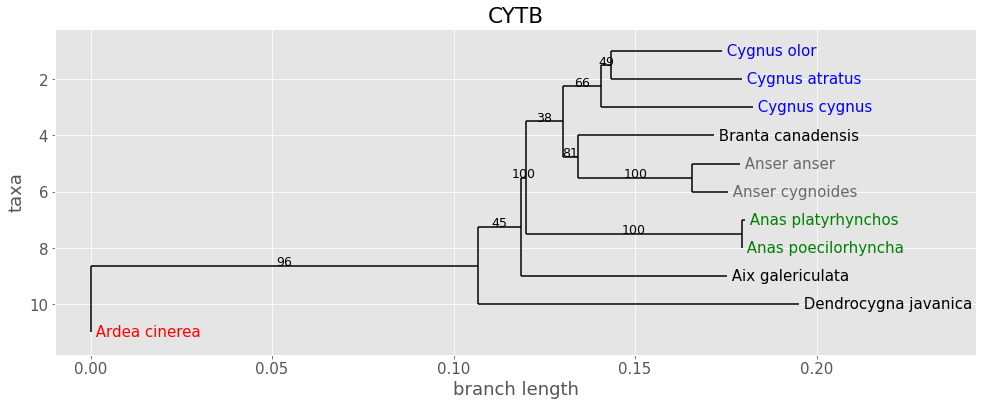

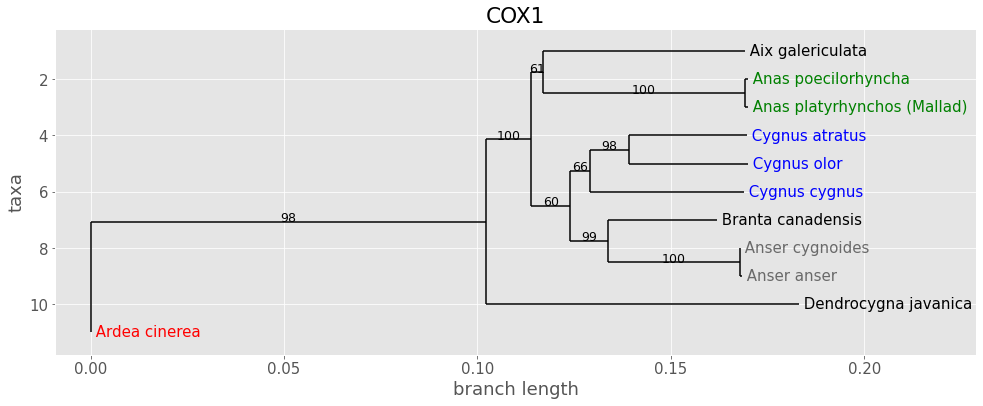

In [144]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import Consensus
from Bio import AlignIO

plt.style.use('ggplot')

aln_cox1 = AlignIO.read('cox1_muscle_align.fasta', 'fasta')
aln_cytb = AlignIO.read('cytb_muscle_align.fasta', 'fasta')

calc = DistanceCalculator('identity')
tc = DistanceTreeConstructor(calc, 'nj')
bootstrap_size = 100
np.random.seed(28)

plt.rcParams['font.size'] = 15 
nplots = 2

def label_func(node):
    if str(node).startswith('Inner'):
        return ''  # don't draw names of inner nodes
    return str(node).replace('_', ' ')

label_colors = {
    'Ardea': 'red',
    'Anas': 'green',
    'Cygnus': 'blue',
    'Branta': 'black',
    'Anser': 'dimgrey'
}

def label_color(label):
    for k, v in label_colors.items():
        if label.startswith(k):
            return v
        
for i, rec in enumerate([(aln_cytb, 'CYTB'), (aln_cox1, 'COX1')]):
    aln, gene = rec
    tree = tc.build_tree(aln)
    btrees = Consensus.bootstrap_trees(aln, bootstrap_size, tc)
    tree = Consensus.get_support(tree, btrees, len_trees=bootstrap_size)
    tree.root_with_outgroup('Ardea_cinerea')
    
    fig, ax = plt.subplots(figsize=(16.5, 6))
    ax.set_title(gene)
    Phylo.draw(tree, label_func=label_func, label_colors=label_color, axes=ax)
    fig.tight_layout()

# 2. ML Tree
IQTREE parameters:
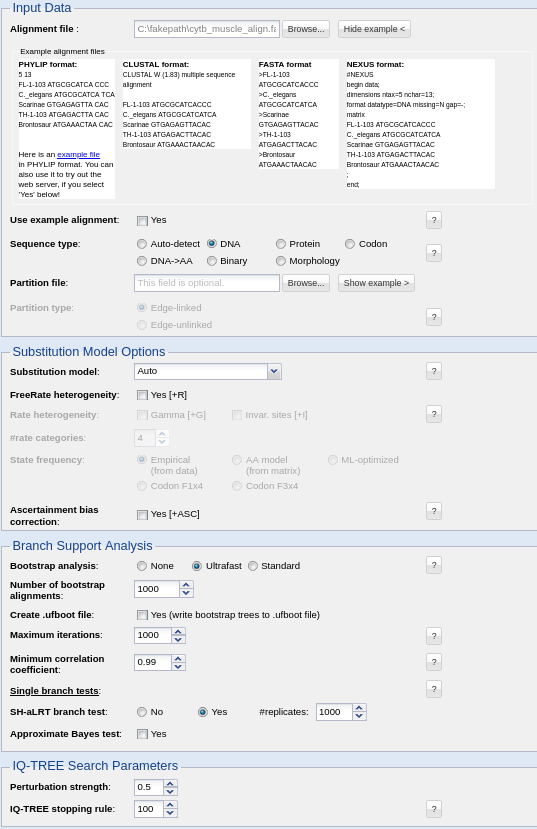

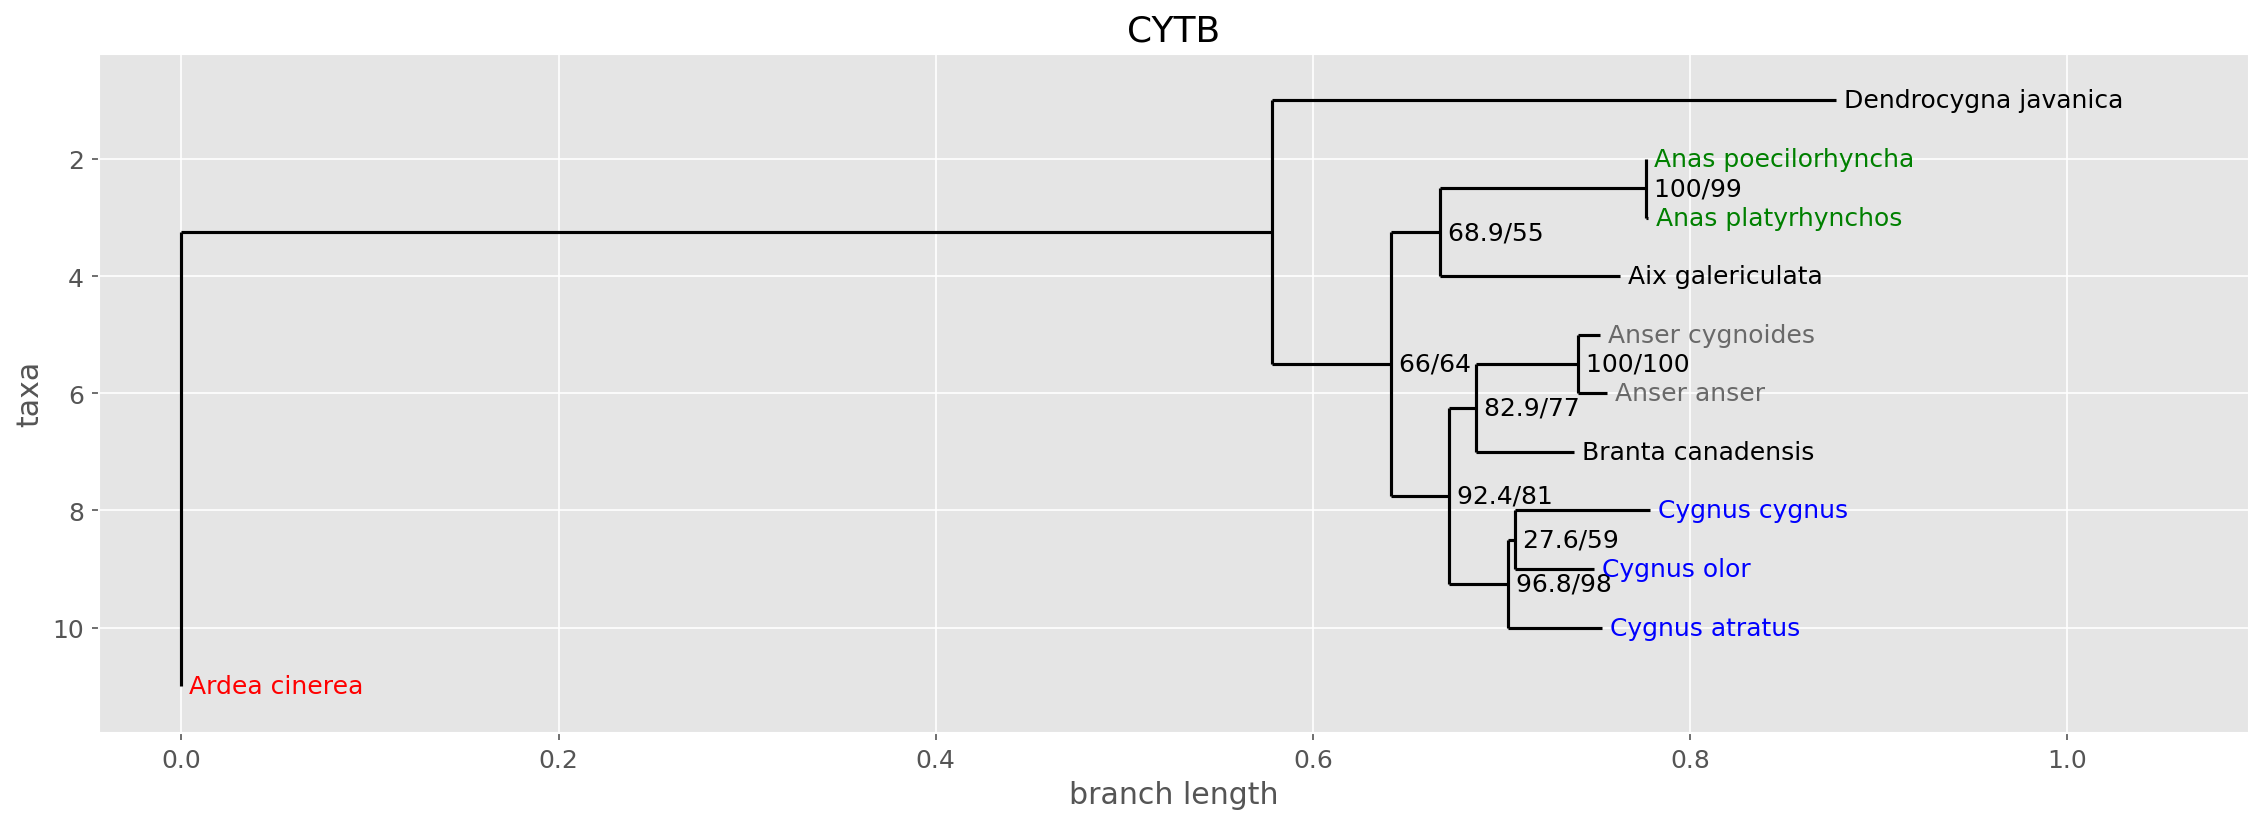

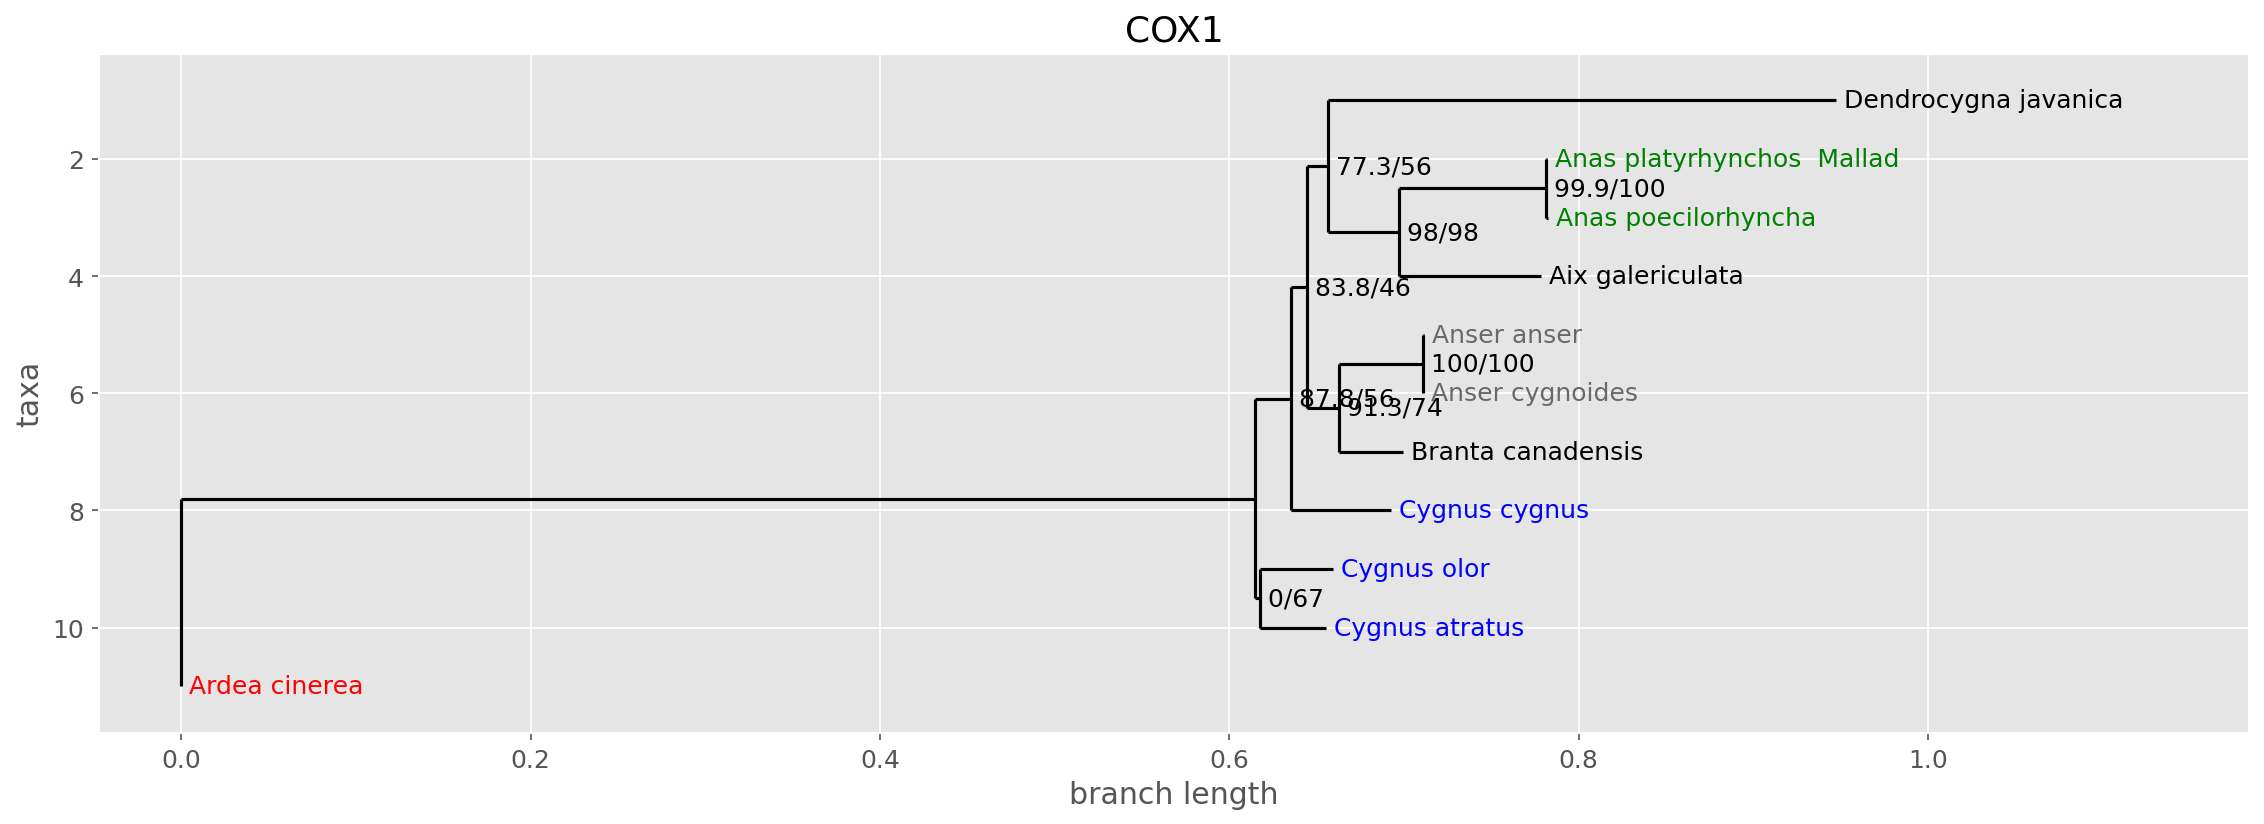

In [185]:
# there seems to be no way of ignoring branch lengths...
cytb_tree = Phylo.read('cytb_iqtree.nwk', 'newick')
cox1_tree = Phylo.read('cox1_iqtree.nwk', 'newick')

plt.rcParams['font.size'] = 12

for tree, gene in [(cytb_tree, 'CYTB'), (cox1_tree, 'COX1')]:
    tree.root_with_outgroup('Ardea_cinerea')
    fig, ax = plt.subplots(figsize=(18.5, 6), dpi=150)
    ax.set_title(gene)
    Phylo.draw(tree, label_func=label_func, label_colors=label_color, axes=ax,
                       )
    fig.tight_layout()

# 

# 3. Bayesian Tree (MrBayes)

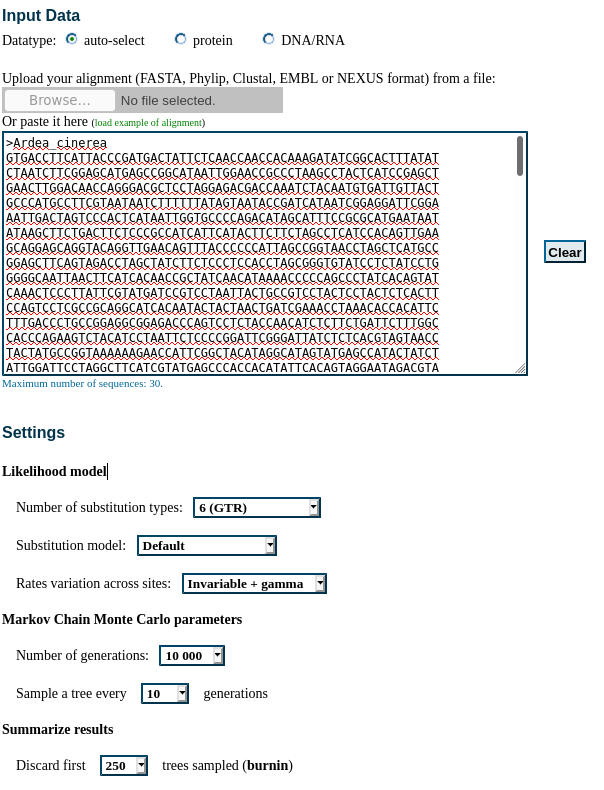

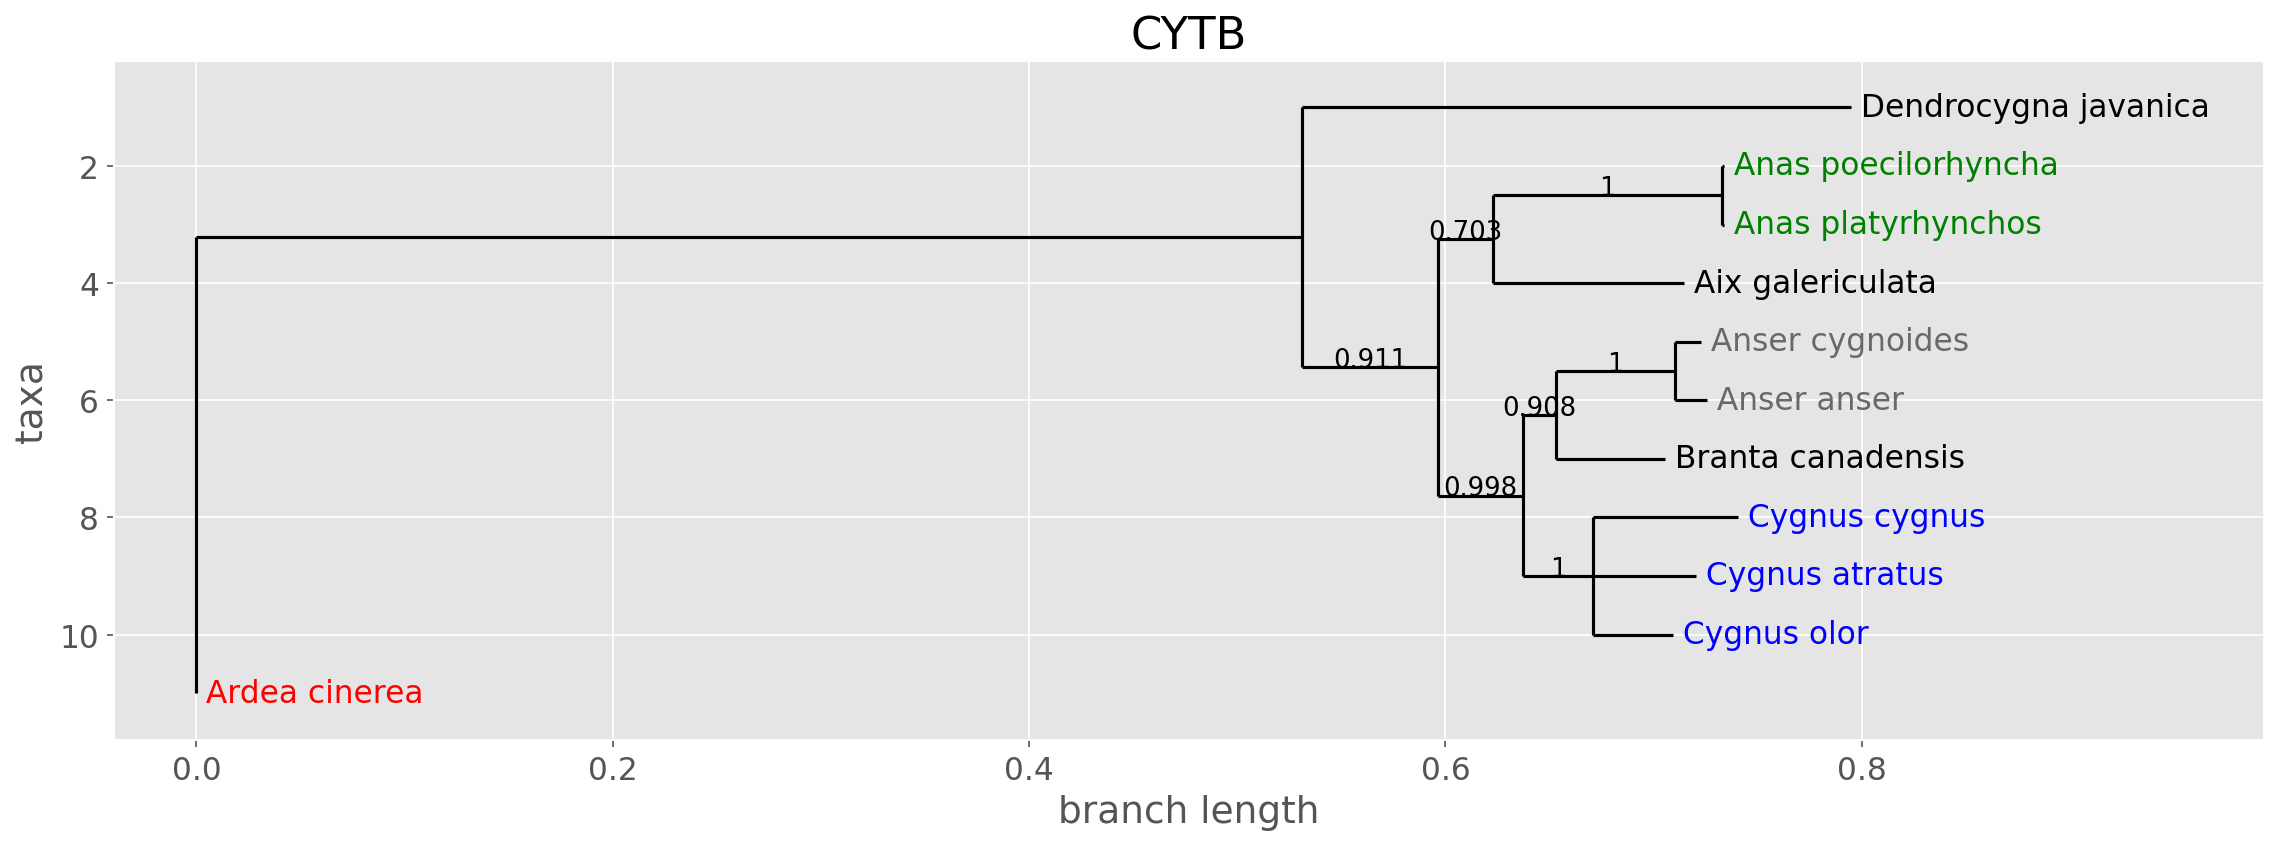

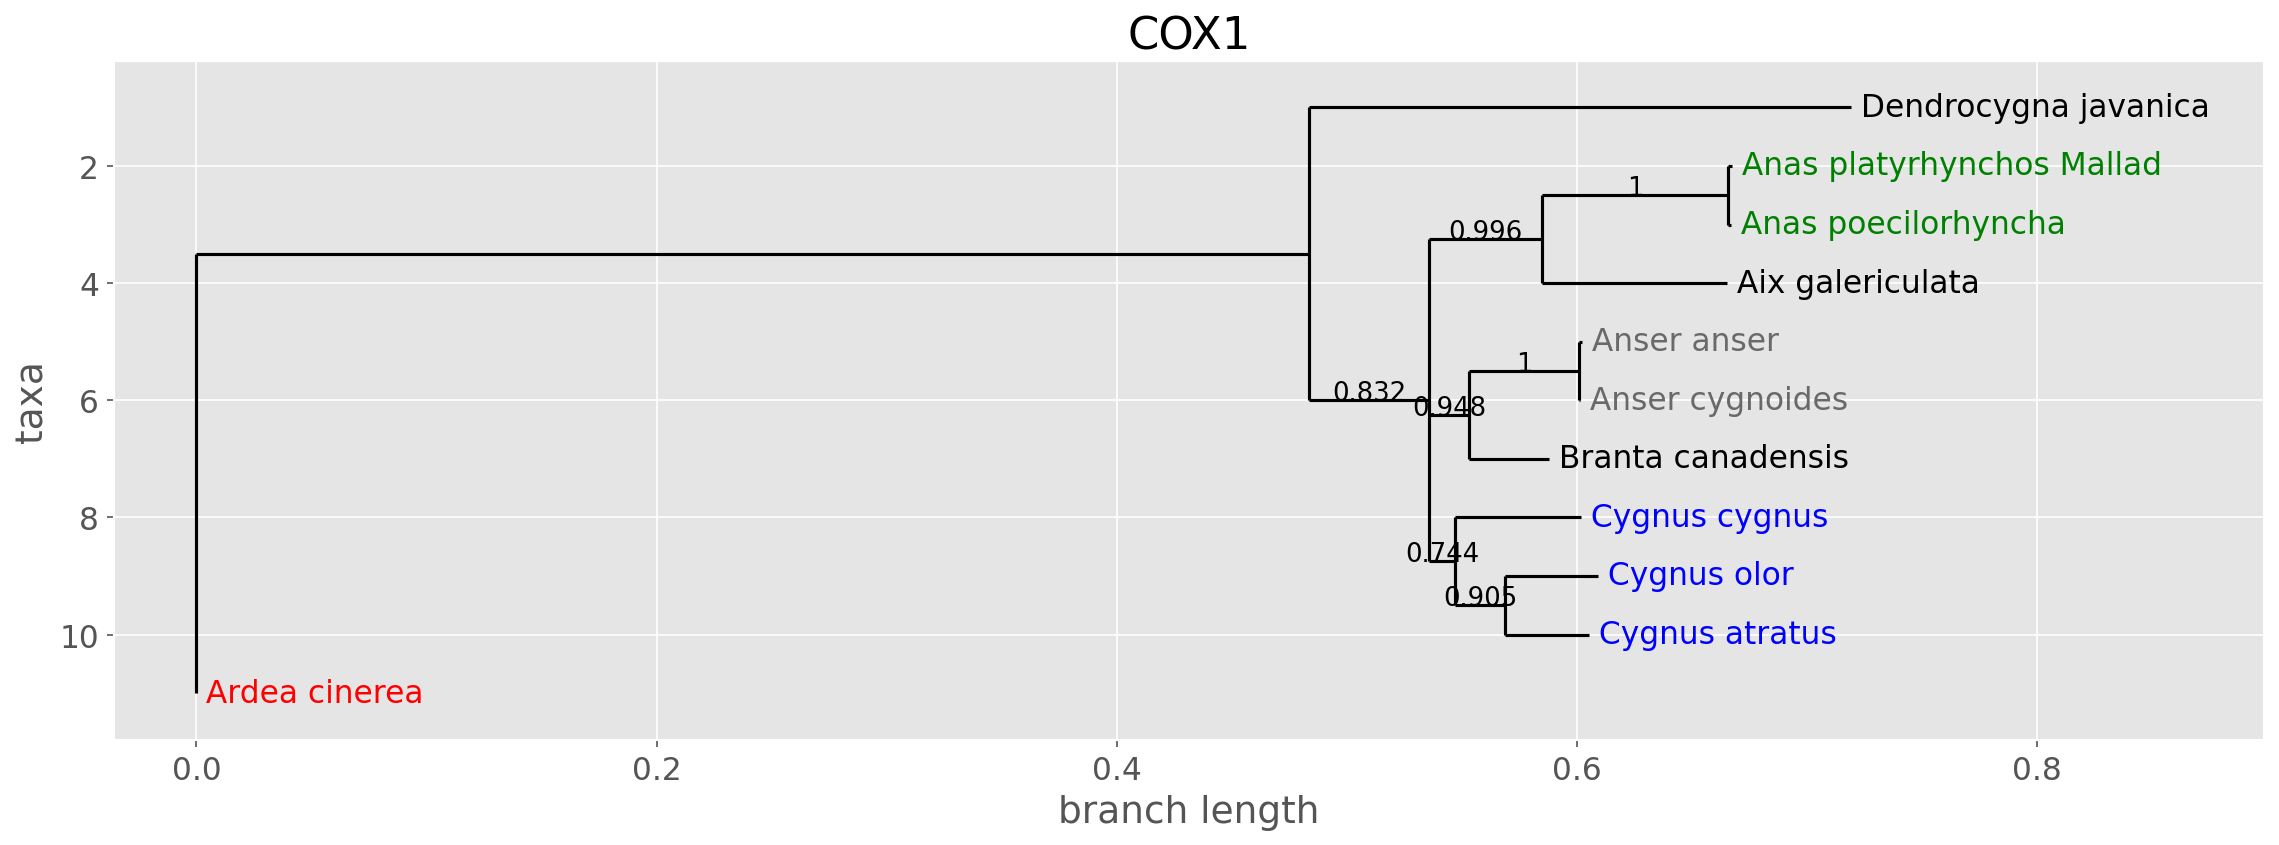

In [183]:
cytb_tree = Phylo.read('cytb_bayes.nwk', 'newick')
cox1_tree = Phylo.read('cox1_bayes.nwk', 'newick')

plt.rcParams['font.size'] = 15

for tree, gene in [(cytb_tree, 'CYTB'), (cox1_tree, 'COX1')]:
    tree.root_with_outgroup('Ardea_cinerea')
    fig, ax = plt.subplots(figsize=(18.5, 6), dpi=150)
    ax.set_title(gene)
    Phylo.draw(tree, label_func=label_func, label_colors=label_color, axes=ax,
                       )
    fig.tight_layout()